In [1]:
mystock = 'fb'

In [2]:
# Load Data and set options
import stockdatalib as sd
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)
# files: screener_results.csv, constituents_csv.csv
stock_count, stock_fields, sp_df = sd.init_stocks_data('./data/','constituents_csv.csv')
#sp_df

In [3]:
# Print Basic Info
sd.set_stock(mystock)
stock_info = sd.get_stock_info(mystock)
# Get stock company information
company_name = stock_info['name'][0]
company_sector = stock_info['sector'][0]
print('Symbol:'+mystock.upper(), ',Company:'+company_name,',Sector:'+company_sector)
squote = sd.quote(mystock)
print('Closed $'+str(squote.close[0]),'on',squote.date[0])

Symbol:FB ,Company:Facebook, Inc. ,Sector:Information Technology
Closed $212.74 on 2020-05-08 16:37:17


In [4]:
# Stats
sd.key_stat(mystock)

,symbol,Date,No. of Shares,Revenue,Earning before Tax,PE Ratio,Earning per Share,Net Income,Free Cash Flow Margin,Gross Profit,Free Cash Flow per Share
0,fb,2020-03-31,2.851000e+09,1.773700e+10,5.861000e+09,112.940777,1.72,4.902000e+09,0.419631,1.427800e+10,2.610663


In [5]:
# Get stock data and Set range
price_df = sd.GetStockDataFrame(mystock)
price_df = sd.DatesRange(price_df, '2019-08-01') # limit the data since a specific past date or a range

In [6]:
# Print range table
print('Closed $'+str(squote.close[0]),'on',squote.date[0])
price_df2, low_df, hi_df, action_df = sd.GetBuySellEnvelope(mystock,price_df, 5)
action_df

Closed $212.74 on 2020-05-08 16:37:17


,Signal,Recommendation,Statement,Last Date,Average % Change,Signal Price,Range
0,Buy,buy,Buy@211.26 - Sell@216.54,2020-05-07 13:30:00,-4.70,211.26,211.26 - 216.54
1,Sell,no,,2020-05-05 13:30:00,5.28,207.07,


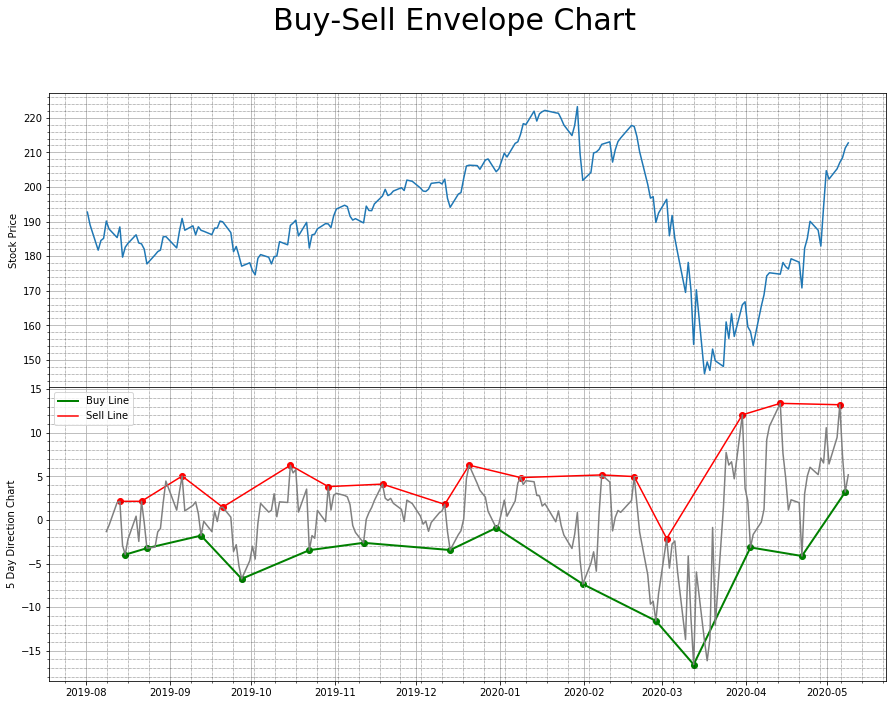

Closed $212.74 on 2020-05-08 16:37:17
Price change range is from  -4.7% to 5.28%
Buy range from  211.26 to 216.54
Last Buy signal on  2020-05-07 13:30:00 Close price was $ 211.26
Last Sell signal on  2020-05-05 13:30:00 Close price was $ 207.07


In [7]:
# Sell-Buy Range
price_df3, low_df, hi_df = sd.PlotBuySellEnvelope(price_df, 5)

print('Closed $'+str(squote.close[0]),'on',squote.date[0])
low_df.dropna(inplace=True)
hi_df.dropna(inplace=True)

date_last_buy = low_df.index[-1]
date_last_sell = hi_df.index[-1]

price_last_buy = price_df3[price_df3.index == low_df.index[-1]][0]
price_last_sell = price_df3[price_df3.index == hi_df.index[-1]][0]
 
ave_min_delta = low_df.mean()
ave_max_delta = hi_df.mean()
print("Price change range is from ",str(round(ave_min_delta,2))+"% to", str(round(ave_max_delta,2))+"%")

if date_last_buy > date_last_sell:
    print("Buy range from ",round( price_last_buy,2), "to", round(price_last_buy+ave_max_delta,2))
else:
    print("Sell range from ",round( price_last_sell,2), "to", round(price_last_sell+ave_min_delta,2))

print("Last Buy signal on ",date_last_buy,"Close price was $",round(price_last_buy,2))
print("Last Sell signal on ",date_last_sell,"Close price was $",round(price_last_sell,2))

<Figure size 1080x432 with 0 Axes>

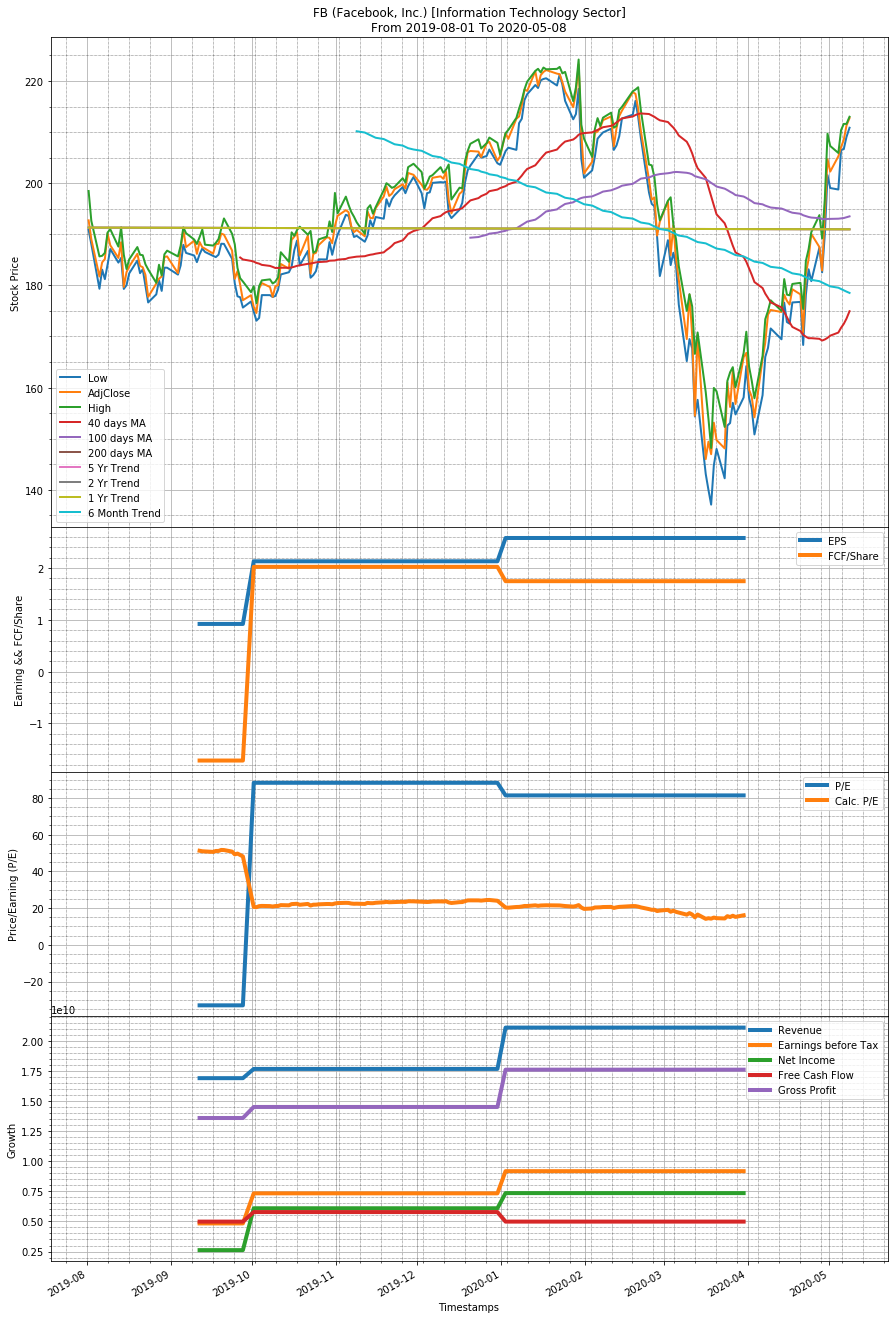

In [8]:
# Plot stock basic charts
price_df = sd.GetStockDataFrame(mystock)
price_df = sd.DatesRange(price_df, '2019-08-01') # limit the data since a specific past date or a range

linear_trends = sd.PlotBasicCharts(mystock,price_df)

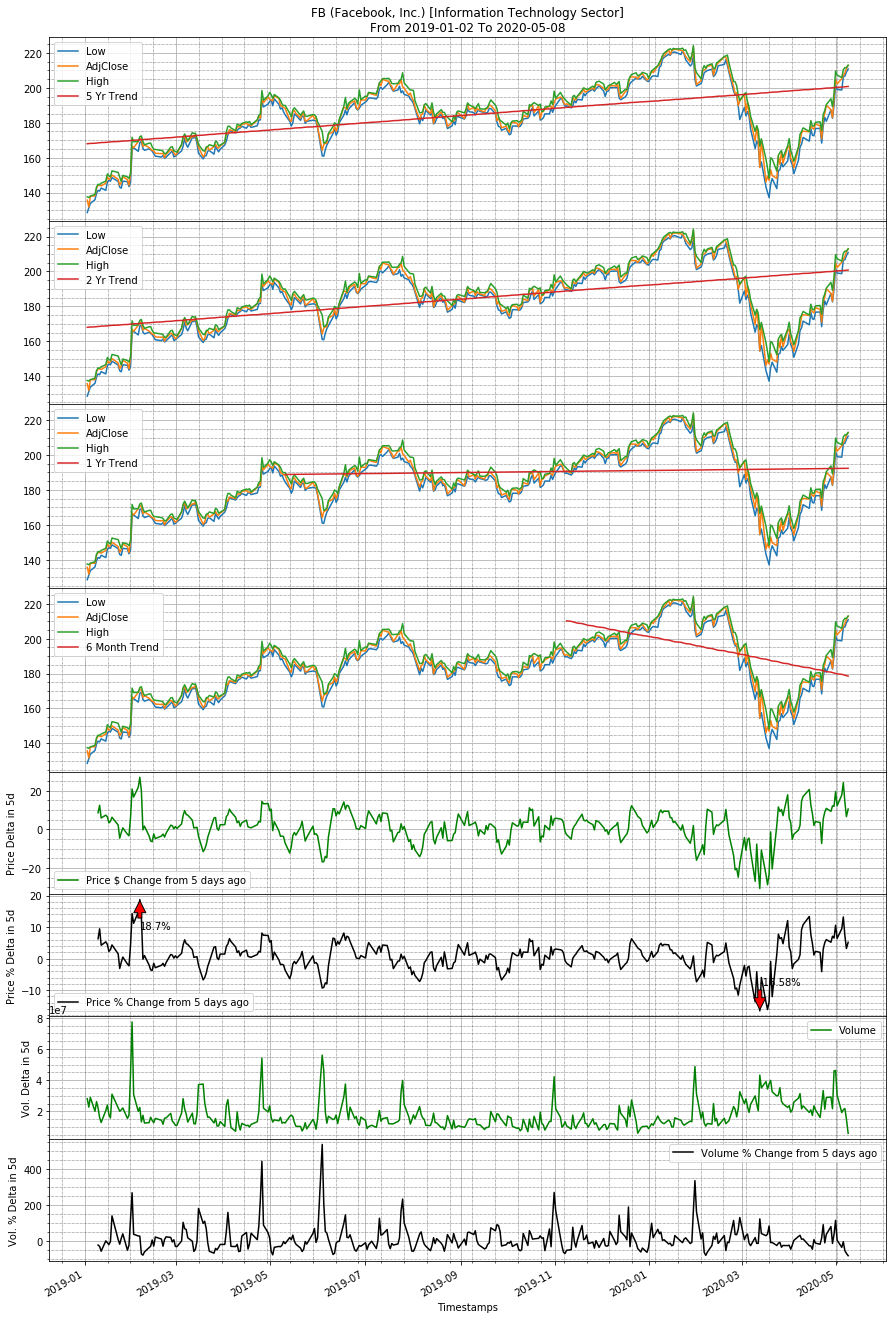

In [9]:
price_df = sd.GetStockDataFrame(mystock)
price_df = sd.DatesRange(price_df, '2019-01-01')
price_data_df, maximums_table_df, trends = sd.PlotTrends(mystock,price_df)

In [10]:
for k,v in trends.items():
    print(k,round(v[1],4))

5y Trend 0.0966
2y Trend 0.0966
1y Trend 0.014
6m Trend -0.2552


In [11]:
maximums_table_df

,Date,Price,Volume
Change Type,,,
Max % Rise,2019-02-05,18.7%,--
Max % Drop,2020-03-12,-16.58%,--
Max % Rise,2019-06-03,--,536.48%
Max % Drop,2020-05-08,--,-80.34%


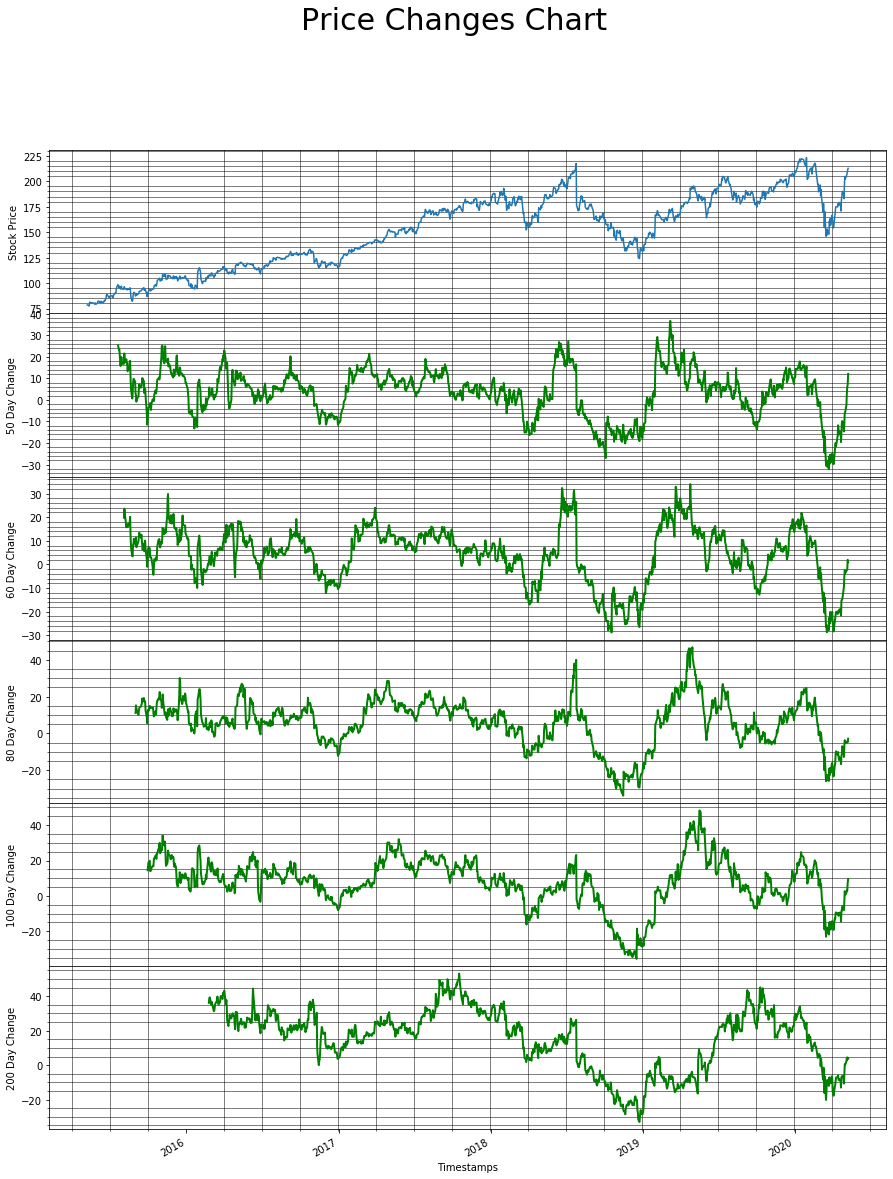

In [12]:
# Set the stock and get the prices dataframe
price_df = sd.GetStockDataFrame(mystock)

# You can limit the range if needed
#price_df = sd.DatesRange(price_df, '2016-02-01')
   
sd.PlotPriceChangesPercent(price_df,[50,60,80,100,200])

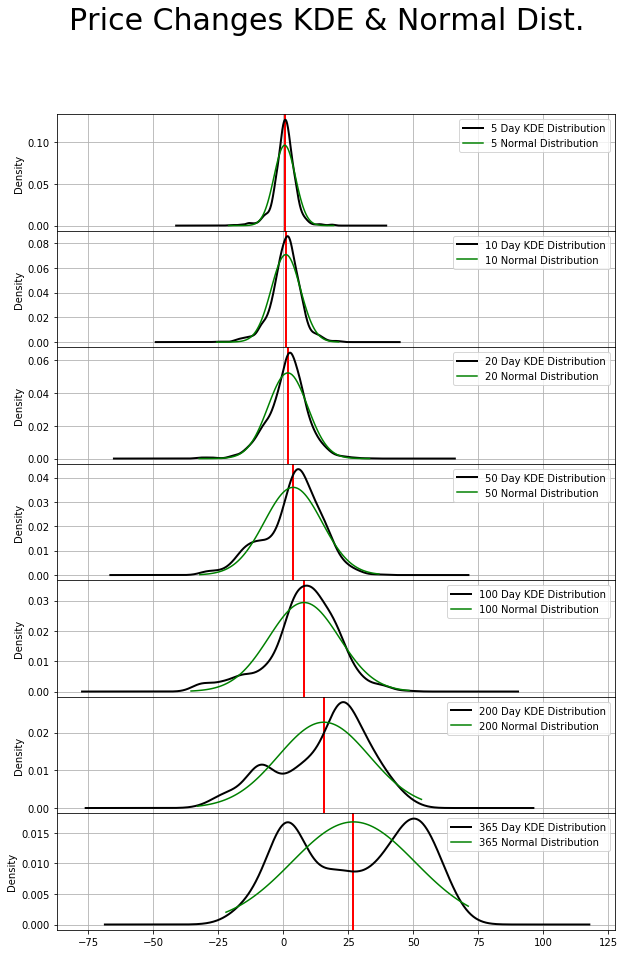

,Record Count,Mean of % Price Change,Std. Dev of % Price Change,Var of % Price Change,Max. % Price Rise,Max % Price Drop
index,,,,,,
5,1255.0,0.476263,4.140449,17.143322,19.311812,-21.080463
10,1250.0,0.905113,5.632343,31.723283,21.235365,-25.671965
20,1240.0,1.695568,7.634447,58.284779,33.130110,-32.429076
50,1210.0,3.720645,11.078839,122.740678,36.708052,-32.157579
100,1160.0,7.899130,13.570920,184.169873,48.299326,-35.544826
200,1060.0,15.519397,17.528932,307.263466,53.072574,-33.023808
365,895.0,26.914507,23.793307,566.121477,71.064748,-22.102222


In [13]:
# Set the stock and get the prices dataframe
price_df = sd.GetStockDataFrame(mystock)
price_changes, stats = sd.PlotPriceChangesKDE(price_df,[5,10,20,50,100,200,365])
stats